# Basic loading

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import matplotlib.dates as mdates  # add import statement for DateFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# get data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('Preprocessed_data.csv')
coffee_df=pd.read_csv('Coffee_df.csv')
rose_df=pd.read_csv('Rose_df.csv')
pomelo_df=pd.read_csv('Pomelo_df.csv')
ginger_df=pd.read_csv('Ginger_df.csv')
squash_df=pd.read_csv('Squash_df.csv')

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3674 non-null   int64  
 1   price          3674 non-null   float64
 2   sales          3674 non-null   float64
 3   rating         3674 non-null   float64
 4   rating_record  3674 non-null   float64
 5   date           3674 non-null   object 
 6   category       3674 non-null   object 
 7   ini_cat        3674 non-null   object 
 8   group_ID       3674 non-null   object 
 9   product_ID     3674 non-null   object 
 10  day_of_week    3674 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 315.9+ KB


Unnamed: 0       0
price            0
sales            0
rating           0
rating_record    0
date             0
category         0
ini_cat          0
group_ID         0
product_ID       0
day_of_week      0
dtype: int64

In [ ]:
# convert the column to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df=df.drop(columns=['Unnamed: 0'])

In [ ]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
#daily_sales['Sales_rounded'] = round(daily_sales['Sales']/ 1000000, 2) * 1000
#daily_sales

In [ ]:
daily_sales

,date,sales
0,2023-02-09,265501.0
1,2023-02-10,280093.0
2,2023-02-11,428111.0
3,2023-02-12,443558.0
4,2023-02-13,328475.0
...,...,...
61,2023-04-11,568700.0
62,2023-04-12,584115.0
63,2023-04-13,471140.0
64,2023-04-14,938750.0


In [ ]:
min_sales_row = daily_sales[daily_sales['sales'] == 166842]
print(min_sales_row)

# Total daily sales

In [ ]:
df

,price,sales,rating,rating_record,date,category,ini_cat,group_ID,product_ID,day_of_week
0,340.00,409.0,4.9,137.0,2023-02-09,Ginger,G,G17,G17,Thursday
1,351.00,1400.0,4.9,490.0,2023-02-09,Coffee,C,C3,C3,Thursday
2,145.00,6200.0,5.0,2000.0,2023-02-09,Ginger,G,G7,G7,Thursday
3,195.00,175.0,4.9,64.0,2023-02-09,Coffee,C,C4,C4,Thursday
4,75.00,20100.0,5.0,8100.0,2023-02-09,Coffee,C,C21,C21,Thursday
...,...,...,...,...,...,...,...,...,...,...
3669,295.00,2500.0,5.0,1000.0,2023-04-15,Squash,S,S13,S13,Saturday
3670,395.00,621.0,4.9,172.0,2023-04-15,Squash,S,S20,S20,Saturday
3671,165.75,10000.0,4.9,3600.0,2023-04-15,Ginger,G,G23,G23,Saturday
3672,360.00,99.0,5.0,27.0,2023-04-15,Coffee,C,C10,C10,Saturday


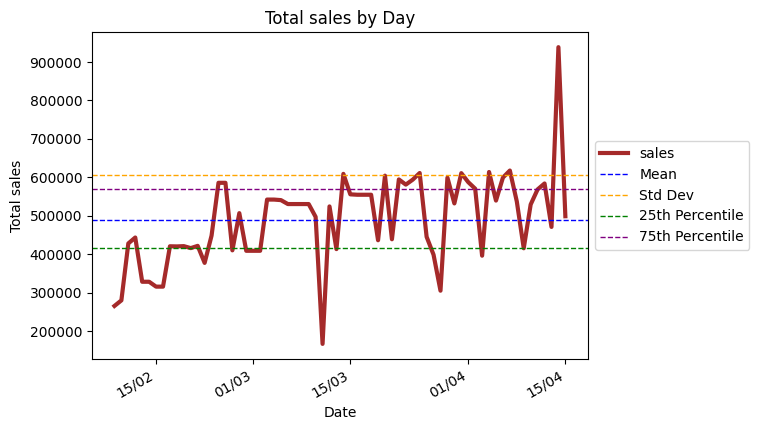

In [ ]:
# calculate mean, standard deviation, and percentiles
mean_sales = daily_sales['sales'].mean()
std_sales = daily_sales['sales'].std()
percentile_25 = np.percentile(daily_sales['sales'], 25)
percentile_75 = np.percentile(daily_sales['sales'], 75)

# create a line plot of sales by day
plt.plot(daily_sales['date'], daily_sales['sales'], color='brown', label='sales')

# add mean, standard deviation, and percentile lines
plt.axhline(y=mean_sales, color='blue', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=mean_sales+std_sales, color='orange', linestyle='--', linewidth=1, label='Std Dev')
plt.axhline(y=percentile_25, color='green', linestyle='--', linewidth=1, label='25th Percentile')
plt.axhline(y=percentile_75, color='purple', linestyle='--', linewidth=1, label='75th Percentile')

# set the x-axis format to display dates in dd/mm format
date_format = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

# add x and y axis labels and a title
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Total sales by Day')

# set the figure size to 10 inches wide by 6 inches tall
#plt.figure(figsize=(10, 6))

# Increase the size of the markers and line
plt.rcParams['lines.linewidth'] = 3

# show the legend box on the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# show the legend and the plot
plt.show()

# (ERROR) daily sales with note box for highest and lowest sales

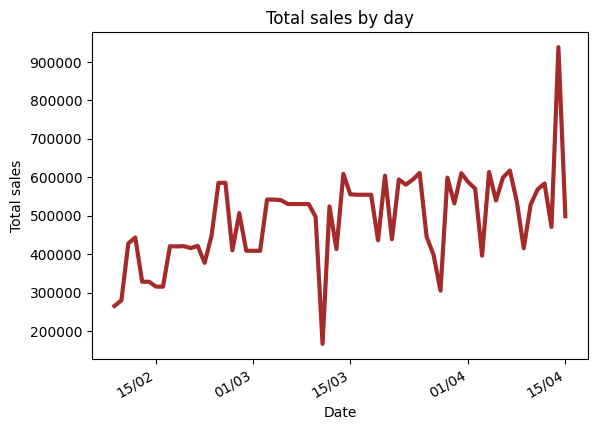

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create a line plot of sales by day
plt.plot(daily_sales['date'], daily_sales['sales'], color='brown')

# Find the index of the highest and lowest points
max_sales_idx = daily_sales['sales'].idxmax()
min_sales_idx = daily_sales['sales'].idxmin()

# Convert dates to numerical representation
x = daily_sales['date'].apply(lambda date: date.toordinal())
y = daily_sales['sales']

# Add annotations for the highest and lowest points
plt.annotate(f'Highest\n(${y[max_sales_idx]:,.2f})\n{daily_sales.iloc[max_sales_idx]["date"].strftime("%b %d, %Y")}', 
             xy=(x[max_sales_idx], y[max_sales_idx]), xytext=(x[max_sales_idx] - 20, y[max_sales_idx] + 500),
             bbox=dict(facecolor='white', alpha=0.5))
plt.annotate(f'Lowest\n(${y[min_sales_idx]:,.2f})\n{daily_sales.iloc[min_sales_idx]["date"].strftime("%b %d, %Y")}', 
             xy=(x[min_sales_idx], y[min_sales_idx]), xytext=(x[min_sales_idx] - 20, y[min_sales_idx] - 500),
             bbox=dict(facecolor='white', alpha=0.5))

# Set the x-axis format to display dates in dd/mm format
date_format = mdates.DateFormatter('%d/%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()

# Add x and y axis labels and a title
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Total sales by day')

# Increase the size of the markers and line
plt.rcParams['lines.linewidth'] = 3

# Set the figure size to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# Show the plot
plt.show()

In [ ]:
max_sales

64

In [ ]:
# specify a formatting function that converts the scientific notation to a fixed-point notation
pd.options.display.float_format = '{:.2f}'.format
# Rename the columns to include count, std, and mean
stats = daily_sales.describe()
stats

,sales
count,66.00
mean,490142.64
std,116852.42
min,166842.00
25%,415682.75
50%,526962.50
75%,570050.75
max,938750.00


#Category sales

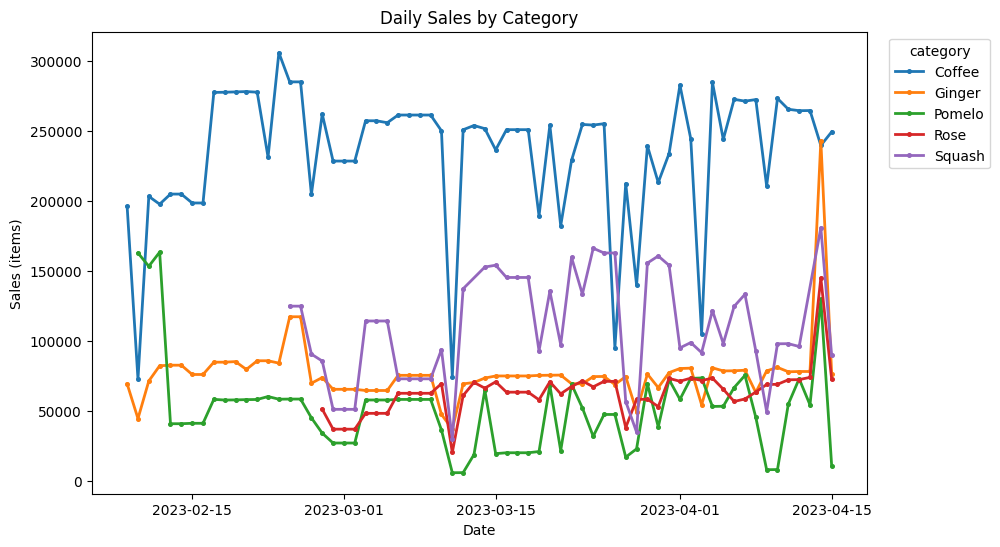

In [ ]:
# Group the data by category and date, and calculate the daily sales
category_all = df.groupby(['category', pd.Grouper(key='date', freq='D')])['sales'].sum().reset_index()

# Create a line graph with a legend note
fig, ax = plt.subplots(figsize=(10, 6))

for category in category_all['category'].unique():
    data = category_all[category_all['category'] == category]
    ax.plot(data['date'], data['sales'], marker='o', label=category)

ax.set_title('Daily Sales by Category')
ax.set_xlabel('Date')
ax.set_ylabel('Sales (items)')
ax.legend(title='category', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.rcParams['lines.markersize'] = 2.6
plt.rcParams['lines.linewidth'] = 2

plt.show()

In [ ]:
category_all

,Category,Date,Sales
0,Coffee,2023-02-09,204104.0
1,Coffee,2023-02-10,72723.0
2,Coffee,2023-02-11,204780.0
3,Coffee,2023-02-12,204900.0
4,Coffee,2023-02-13,205025.0
...,...,...,...
289,Squash,2023-04-10,97951.0
290,Squash,2023-04-11,98041.0
291,Squash,2023-04-12,96029.0
292,Squash,2023-04-14,180993.0


In [ ]:
grouped_sales = df.groupby(['category'])['sales'].sum()
grouped_sales_df = grouped_sales.reset_index()
grouped_sales_df['percentage']=(grouped_sales_df['sales']/(grouped_sales_df['sales'].sum()))*100

grouped_count = df.groupby(['category'])['sales'].count()
grouped_count_df = grouped_count.reset_index()
grouped_count_df['percentage']=(grouped_count_df['sales']/(grouped_count_df['sales'].sum()))*100

In [ ]:
grouped_count_df

,category,sales,percentage
0,Coffee,893,24.31
1,Ginger,1024,27.87
2,Pomelo,490,13.34
3,Rose,621,16.90
4,Squash,646,17.58


In [ ]:
grouped_sales_df

,category,sales,percentage
0,Coffee,15518346.00,47.97
1,Ginger,5078139.00,15.70
2,Pomelo,3361498.00,10.39
3,Rose,3032411.00,9.37
4,Squash,5359020.00,16.57


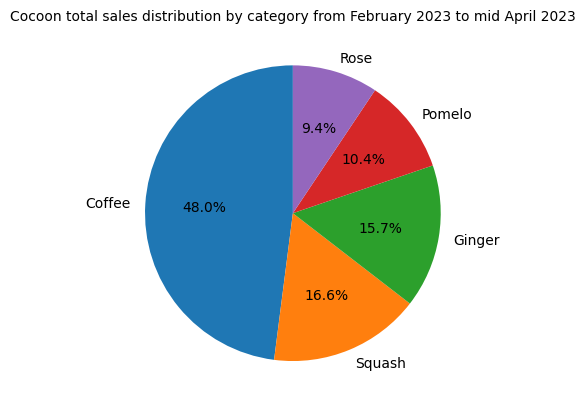

In [ ]:
# create a pie chart of sales % using matplotlib
plt.pie(grouped_sales_df['percentage'], labels=grouped_sales_df['category'], autopct='%1.1f%%', startangle=90)

# add a title to the chart
plt.title('Cocoon total sales distribution by category from February 2023 to mid April 2023',fontsize=10)

# show the chart
plt.show()

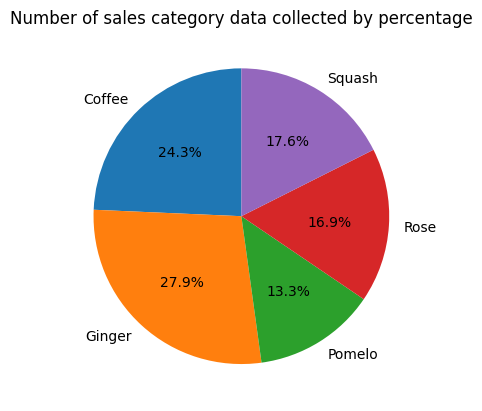

In [ ]:
#create a pie chart of sales % using matplotlib
plt.pie(grouped_count_df['percentage'], labels=grouped_count_df['category'], autopct='%1.1f%%', startangle=90)

# add a title to the chart
plt.title('Number of sales category data collected by percentage')

# show the chart
plt.show()

In [ ]:
grouped_sales_df = grouped_sales_df.sort_values(by='sales', ascending=False)
grouped_count_df = grouped_count_df.sort_values(by='sales', ascending=False)

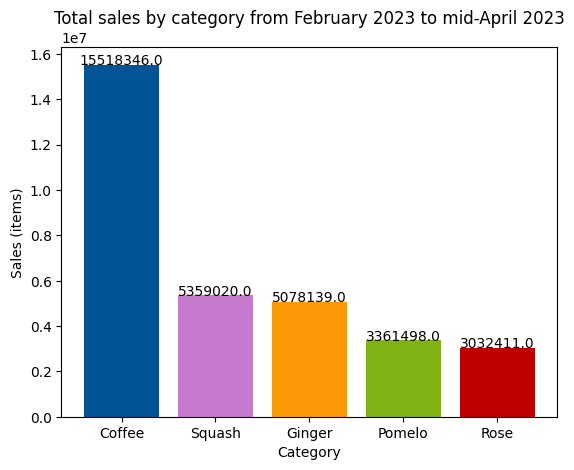

In [ ]:
import matplotlib.pyplot as plt

# Define the colors
colors = ['#035397', '#C67ACE', '#FA9905', '#81B214','#BE0000']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar graph
ax.bar(grouped_sales_df['category'], grouped_sales_df['sales'], color=colors)

# Set the title and axis labels
ax.set_title('Total sales by category from February 2023 to mid-April 2023')
ax.set_xlabel('Category')
ax.set_ylabel('Sales (items)')

# Add labels with values above the bars
for i, v in enumerate(grouped_sales_df['sales']):
    ax.text(i, v, str(v), ha='center')

# Display the graph
plt.show()

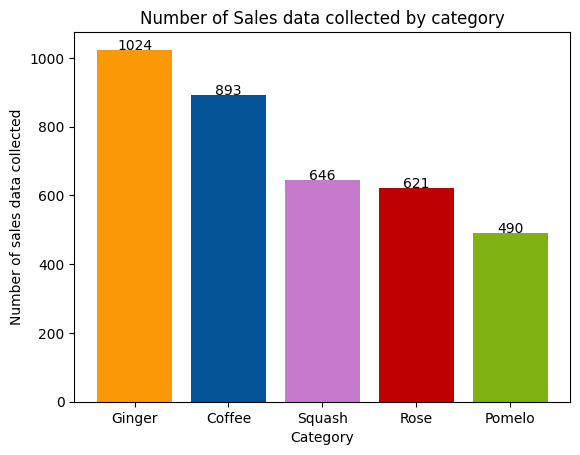

In [ ]:
# Define the colors
colors = ['#FA9905','#035397','#C67ACE','#BE0000','#81B214']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar graph
ax.bar(grouped_count_df['category'], grouped_count_df['sales'], color=colors)

# Set the title and axis labels
ax.set_title('Number of Sales data collected by category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of sales data collected')

# Add labels with values above the bars
for i, v in enumerate(grouped_count_df['sales']):
    ax.text(i, v+1, str(v), ha='center')

# Display the graph
plt.show()

# Rating and Rating record

In [ ]:
df

,price,sales,rating,rating_record,date,category,ini_cat,group_ID,product_ID,day_of_week
0,340.00,409.00,4.90,137.00,2023-02-09,Ginger,G,G17,G17,Thursday
1,351.00,1400.00,4.90,490.00,2023-02-09,Coffee,C,C3,C3,Thursday
2,145.00,6200.00,5.00,2000.00,2023-02-09,Ginger,G,G7,G7,Thursday
3,195.00,175.00,4.90,64.00,2023-02-09,Coffee,C,C4,C4,Thursday
4,75.00,20100.00,5.00,8100.00,2023-02-09,Coffee,C,C21,C21,Thursday
...,...,...,...,...,...,...,...,...,...,...
3669,295.00,2500.00,5.00,1000.00,2023-04-15,Squash,S,S13,S13,Saturday
3670,395.00,621.00,4.90,172.00,2023-04-15,Squash,S,S20,S20,Saturday
3671,165.75,10000.00,4.90,3600.00,2023-04-15,Ginger,G,G23,G23,Saturday
3672,360.00,99.00,5.00,27.00,2023-04-15,Coffee,C,C10,C10,Saturday


In [ ]:
# group by Category and Rating, and count the number of occurrences
count_rating = df.groupby(['category', 'rating'])['rating'].count()
# pivot the Rating values into separate columns
count_rating_df = count_rating.unstack(level=-1)

In [ ]:
count_rating_df 

rating,0.0,4.0,4.3,4.5,4.6,4.7,4.8,4.9,5.0
category,,,,,,,,,
Coffee,20.0,7.0,1.0,5.0,5.0,5.0,32.0,383.0,435.0
Ginger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684.0,340.0
Pomelo,NaN,NaN,NaN,NaN,NaN,NaN,9.0,414.0,67.0
Rose,NaN,NaN,NaN,NaN,NaN,NaN,13.0,321.0,287.0
Squash,3.0,4.0,NaN,NaN,NaN,4.0,34.0,348.0,253.0


In [ ]:
print(df['rating'].value_counts())

4.9    2150
5.0    1382
4.8      88
0.0      23
4.0      11
4.7       9
4.5       5
4.6       5
4.3       1
Name: rating, dtype: int64


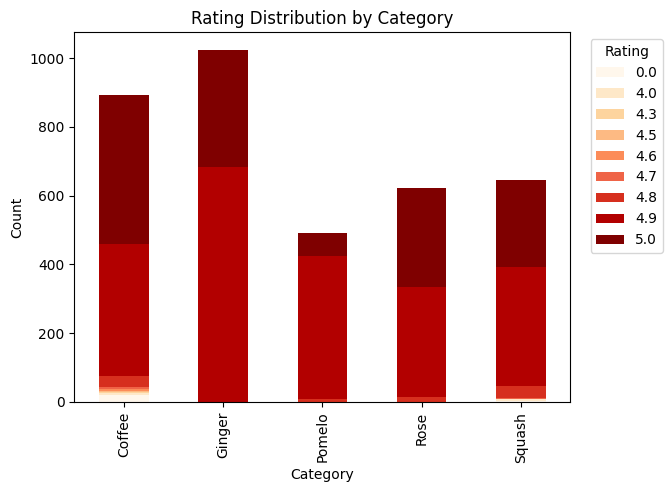

In [ ]:
color_map = 'OrRd'  # choose a colormap
# plot a stacked bar chart with the color of the Rating value
count_rating_df.plot(kind='bar', stacked=True, cmap=color_map)

# customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Rating Distribution by Category')
plt.legend(title='Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

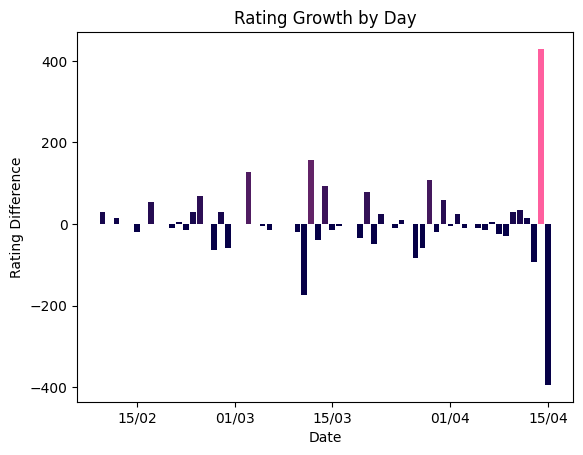

In [ ]:
# Create a gradient color map
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as dates

cmap = LinearSegmentedColormap.from_list('mycmap', ['#060047', '#FF5F9E'])

# Group the data by date and calculate the daily sales
daily_rate = df.groupby(pd.Grouper(key='date', freq='D'))['rating'].sum().reset_index()

# Calculate the difference in sales between consecutive days
daily_rate['rate_diff'] = daily_rate['rating'].diff()

# Create a bar chart of sales difference by day
fig, ax = plt.subplots()
ax.bar(daily_rate['date'], daily_rate['rate_diff'], color=cmap(daily_rate['rate_diff']/daily_rate['rate_diff'].max()))
ax.set_title('Rating Growth by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Rating Difference')

# Set date format
date_format = '%d/%m'
ax.xaxis.set_major_formatter(dates.DateFormatter(date_format))


plt.show()

In [ ]:
daily_rate

,date,rating,rate_diff
0,2023-02-09,133.7,NaN
1,2023-02-10,163.0,29.3
2,2023-02-11,163.2,0.2
3,2023-02-12,177.9,14.7
4,2023-02-13,177.9,0.0
...,...,...,...
61,2023-04-11,330.1,34.0
62,2023-04-12,345.0,14.9
63,2023-04-13,251.7,-93.3
64,2023-04-14,680.8,429.1


In [ ]:
# Write the DataFrame to a CSV file
daily_rate.to_csv("daily_rate.csv", index=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-1c62efc52b36>", line 2, in <cell line: 2>
    daily_rate.to_csv("daily_rate.csv", index=True)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 3720, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py", line 1189, in to_csv
    csv_formatter.save()
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/formats/csvs.py", line 241, in save
    with get_handle(
  File "/usr/local/lib/python3.10/dist-pac

# Sales difference

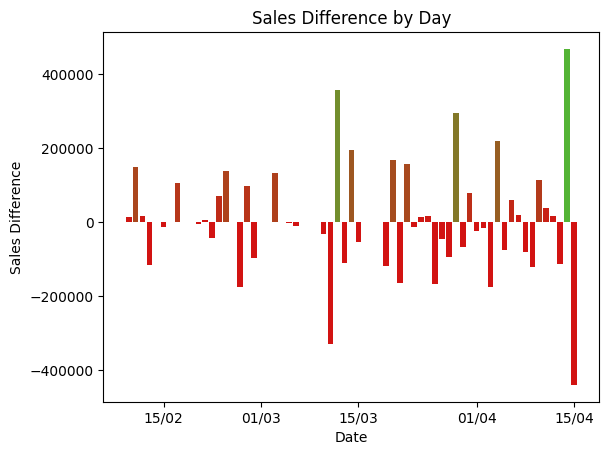

In [ ]:
# Create a gradient color map
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as dates

cmap = LinearSegmentedColormap.from_list('mycmap', ['#D21312', '#54B435'])

# Group the data by date and calculate the daily sales
daily_sales = df.groupby(pd.Grouper(key='date', freq='D'))['sales'].sum().reset_index()

# Calculate the difference in sales between consecutive days
daily_sales['sales_diff'] = daily_sales['sales'].diff()

# Create a bar chart of sales difference by day
fig, ax = plt.subplots()
ax.bar(daily_sales['date'], daily_sales['sales_diff'], color=cmap(daily_sales['sales_diff']/daily_sales['sales_diff'].max()))
ax.set_title('Sales Difference by Day')
ax.set_xlabel('Date')
ax.set_ylabel('Sales Difference')

# Set date format
date_format = '%d/%m'
ax.xaxis.set_major_formatter(dates.DateFormatter(date_format))

# Add line for average discount
# discount = df['Discount']
# ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
# ax.axhline(y=discount * 100, color='red', linestyle='--', linewidth=1)
# ax.text(-0.5, discount * 100 + 5, 'Avg. Discount: {:.2f}%'.format(discount * 100), color='red', fontsize=10)

plt.show()

# Top lists 

In [ ]:
ID_sales = df.groupby(['product_ID','category'])['sales'].sum()
ID_sales_df = ID_sales.reset_index()
ID_sales_df

,product_ID,category,sales
0,C1,Coffee,4977.00
1,C10,Coffee,2178.00
2,C11,Coffee,642300.00
3,C12,Coffee,10.00
4,C13,Coffee,220300.00
...,...,...,...
114,S5,Squash,1239.00
115,S6,Squash,2616.00
116,S7,Squash,28200.00
117,S8,Squash,20200.00


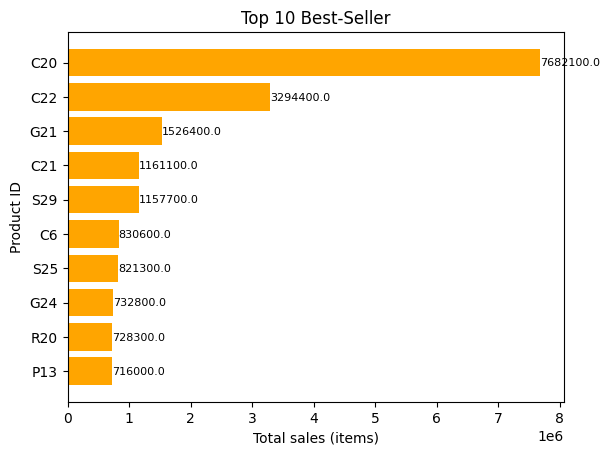

In [ ]:
# Sort data by sales and get top 10 sellers
ID_sorted = ID_sales_df.sort_values('sales', ascending=True)
ID_top10 = ID_sorted.tail(10)

# Create plot
fig, ax = plt.subplots()
ax.barh(ID_top10['product_ID'], ID_top10['sales'],color='orange')

# Set plot title and labels
ax.set_title('Top 10 Best-Seller')
ax.set_xlabel('Total sales (items)')
ax.set_ylabel('Product ID')

# Add data labels
for i, v in enumerate(ID_top10['sales']):
    ax.text(v + 5 , i - 0.1, str(v), color='black', fontsize=8)

# Show plot
plt.show()

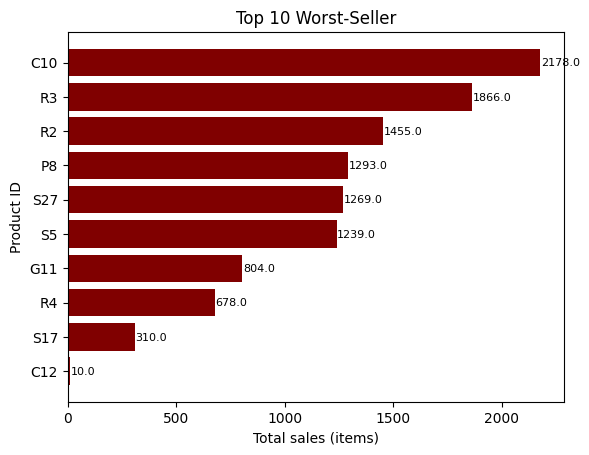

In [ ]:
ID_bot10 = ID_sorted.head(10)

# Create plot
fig, ax = plt.subplots()
ax.barh(ID_bot10['product_ID'], ID_bot10['sales'],color='maroon')

# Set plot title and labels
ax.set_title('Top 10 Worst-Seller')
ax.set_xlabel('Total sales (items)')
ax.set_ylabel('Product ID')

# Add data labels
for i, v in enumerate(ID_bot10['sales']):
    ax.text(v + 3, i - 0.1, str(v), color='black', fontsize=8)

# Show plot
plt.show()

# Relationship plots (Scatter plot, Box plot, Heatmap)

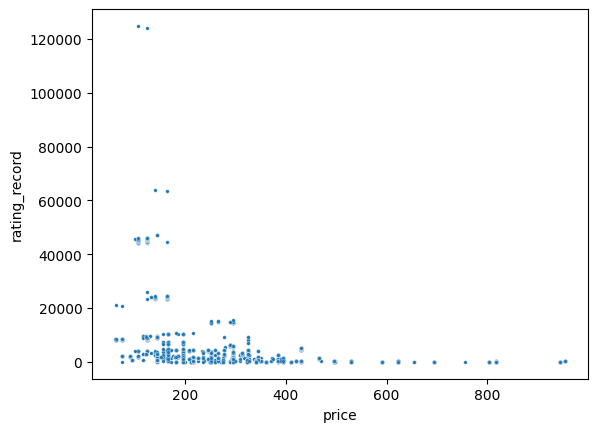

Pearson's r correlation coefficient: -0.308, p-value: 0.000


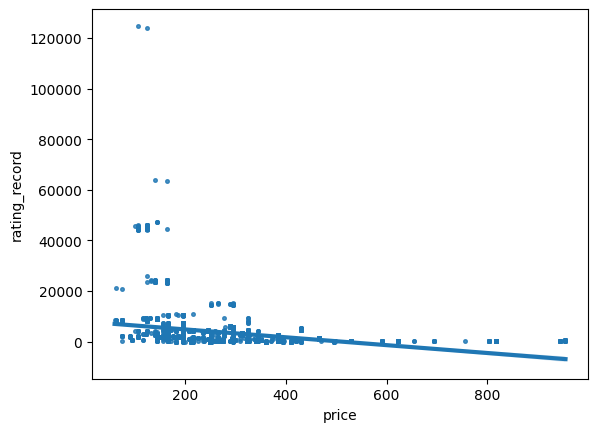

In [ ]:
import scipy.stats as stats

# Create the scatter plot
sns.scatterplot(x='price', y='rating_record', data=df)
plt.show()

# Calculate the Pearson's r correlation coefficient
corr, p_value = stats.pearsonr(df['price'], df['rating_record'])
print(f"Pearson's r correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}")

# Add the trend line to the scatter plot
sns.regplot(x='price', y='rating_record', data=df)
plt.show()

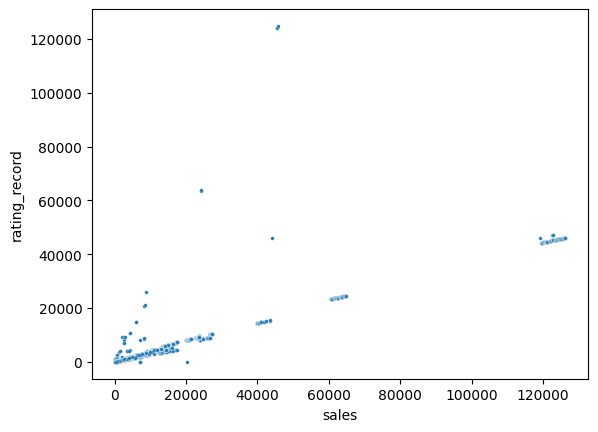

Pearson's r correlation coefficient: 0.918, p-value: 0.000


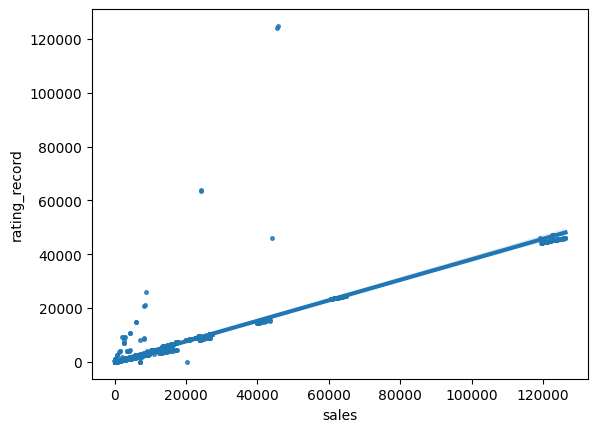

In [ ]:
import scipy.stats as stats

# Create the scatter plot
sns.scatterplot(x='sales', y='rating_record', data=df)
plt.show()

# Calculate the Pearson's r correlation coefficient
corr, p_value = stats.pearsonr(df['sales'], df['rating_record'])
print(f"Pearson's r correlation coefficient: {corr:.3f}, p-value: {p_value:.3f}")

# Add the trend line to the scatter plot
sns.regplot(x='sales', y='rating_record', data=df)
plt.show()

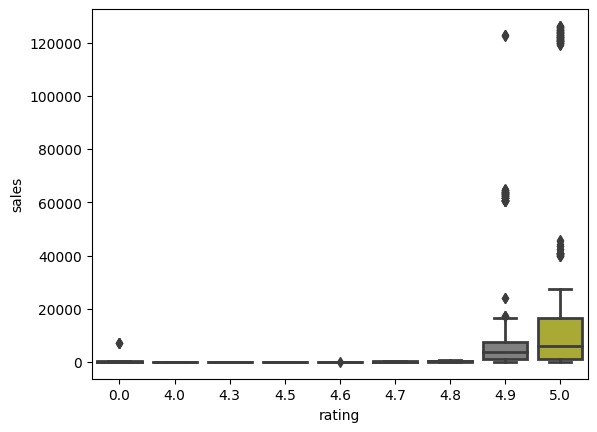

In [ ]:
sns.boxplot(x=df['rating'],y=df['sales'])
plt.show()

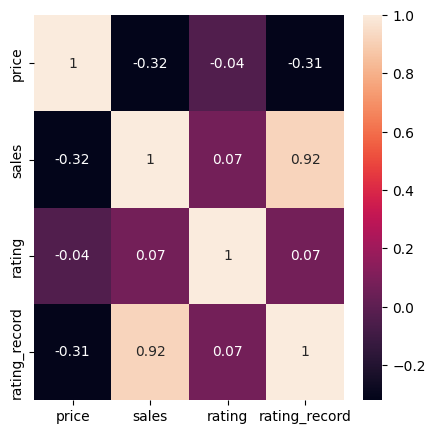

In [ ]:
plt.figure(figsize=(5 ,5)) # resize the figure size in plots
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()